# Convergence of gradient descent and choice of step size

## This is the homework for reproducing figures in Chapter 5 of the textbook, from the course "Learning Theory from First Principles" by Francis Bach

In [1]:
import numpy as np
import matplotlib.pyplot as plt

d = 1000 # dimension of theta

# Convergence of gradient descent (page 90 of the textbook)

Quadratic optimization problems are defined as minimizing $F(\theta)=\frac{1}{2}\theta^T H\theta-c^T\theta$. For the function to be convex, we have $H$ being positive semi-definite. Now consider two quadratic optimization problems with two different decays of eigenvalues ($\lambda_k$) for the Hessian matrix H, one as $\frac{1}{k}$ and one in $\frac{1}{k^2}$. Calculate that $\nabla F(\theta)=H\theta-c$. This will be used in the gradient descent algorithm.

For both cases, $L=1$ since the largest eigenvalue of $H$ is 1. Then, set the learning rate as $\frac{1}{L}=1$. The analytical solution is given by $H\theta=c$, which means $\theta=H^{-1}c$ ($H$ is invertible).

In [2]:
def gradF(H,c,theta):
    return np.matmul(H,theta)-c

def F(H,c,theta):
    return np.matmul(theta.T,np.matmul(H,theta))/2-np.dot(c,theta)

In [70]:
gamma = 1 # learning rate
c = np.zeros(d)
T = 1000 # number of iterations

# Convergence rate as 1/k
inv = [1./j for j in range(1,d+1)]
H_inv = np.diag(inv)
# for a good visualization, set theta_hat to be a value put at the bottom of this Jupyter notebook
# it is too long to be put here
theta_hat = np.random.randn(d)
theta_hat2 = np.copy(theta_hat)*3
min_inv = F(H_inv,c,np.matmul(np.linalg.inv(H_inv),c)) # minimum value of F
F_inv = [F(H_inv,c,theta_hat)] # record for values of F from GD iterations, initial value as 0
for t in range(T):
    # print(t)
    theta_hat -= gamma*gradF(H_inv,c,theta_hat)
    F_inv.append(F(H_inv,c,theta_hat))
F_diff_inv = F_inv - min_inv
print(F_diff_inv)

# Convergence rate as 1/k^2
inv2 = [1./j**2 for j in range(1,d+1)]
H_inv2 = np.diag(inv2)
min_inv2 = F(H_inv2,c,np.matmul(np.linalg.inv(H_inv2),c)) # minimum value of F
F_inv2 = [F(H_inv2,c,theta_hat2)] # record for values of F from GD iterations, initial value as 0
for t in range(T):
    # print(t)
    theta_hat2 -= gamma*gradF(H_inv2,c,theta_hat2)
    F_inv2.append(F(H_inv2,c,theta_hat2))
F_diff_inv2 = F_inv2 - min_inv2
print(F_diff_inv2)

[3.07998183 2.53608575 2.28871081 ... 0.02384509 0.02377771 0.02371054]
[3.07443469 2.03343757 1.56994349 ... 0.07567883 0.07563853 0.07559831]


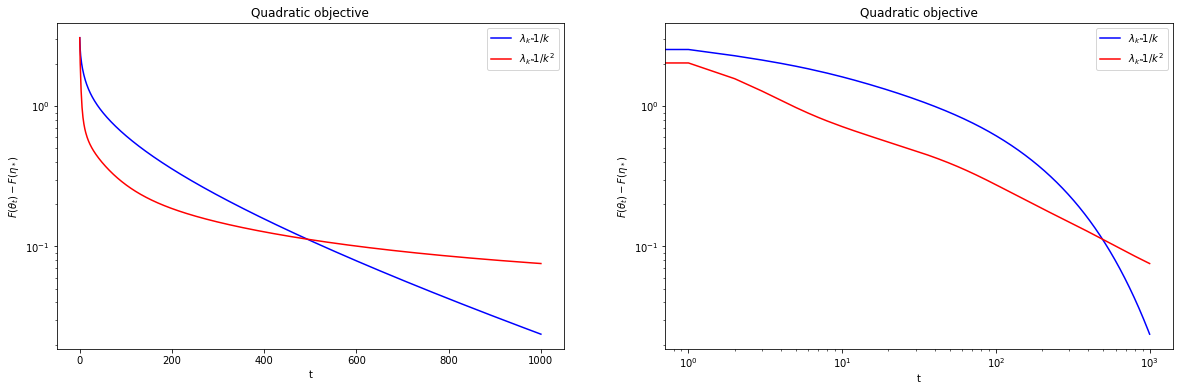

In [73]:
time = np.arange(T+1)
plt.figure(figsize=(20,6))
plt.subplot(121)
plt.plot(time,F_diff_inv,color='b',label=r'$\lambda_k \~ 1/k$')
plt.plot(time,F_diff_inv2,color='r',label=r'$\lambda_k \~ 1/k^2$')
plt.yscale('log')
plt.xlabel('t')
plt.ylabel(r'$F(\theta_t)-F(\eta_*)$')
plt.title('Quadratic objective')
plt.legend()

plt.subplot(122)
plt.plot(time,F_diff_inv,color='b',label=r'$\lambda_k \~ 1/k$')
plt.plot(time,F_diff_inv2,color='r',label=r'$\lambda_k \~ 1/k^2$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('t')
plt.ylabel(r'$F(\theta_t)-F(\eta_*)$')
plt.title('Quadratic objective')
plt.legend()

plt.show()

# Choice of step size (page 108 of the textbook)

We consider a simple (linearly non-separable) binary classification problem with linear predictors and features with $l_2$-norm bounded by $R$. For $\theta\in\mathbb{R}^2$, the loss function will be $L(\theta)=\frac{1}{N}\sum_{i=1}^N$hinge_loss$(y_i,\theta^T X^{(i)})+\frac{\mu}{2}||\theta||_2^2$.

Then, $\frac{\partial L(\theta)}{\partial \theta_j}=\frac{1}{N}\sum_{i=1}^N(-y_i X_j^{(i)}\text{ if }y_i\cdot\theta^T X^{(i)}<1\text{, 0 otherwise})+\mu\theta_j$.

In [150]:
import math
dim = 100

def data_generation(num):
    # generate a linearly non-separable data
    # for example, y = 1 if x is in the unit sphere of R^n and 0 otherwise
    # here we use 2-dimension x
    X = np.random.randn(num,dim)
    y = np.zeros(num)
    for i in range(num):
        if np.linalg.norm(X[i,:]) < 1:
            y[i] = 1
        else:
            y[i] = -1
    return X,y

def hinge_loss(y,y_hat):
    return np.mean(np.maximum(np.zeros(y.shape[0]),1-y*y_hat))

def gradL(X,y,theta_hat_svm,mu):
    sum_list = np.zeros((X.shape[0],X.shape[1]))
    for i in range(X.shape[0]):
        if y[i]*np.dot(X[i,:],theta_hat_svm) < 1:
            sum_list[i,:] = -y[i]*X[i,:]
    first_term = np.mean(sum_list,axis=0)
    second_term = np.array([theta_hat_svm[i] for i in range(dim)])*mu
    return first_term+second_term

[1.73801235e-01 1.53750330e-01 1.39575744e-01 ... 3.90294526e-06
 7.14242586e-07 1.00000000e-06]
[1.73801235e-01 7.67332207e+01 3.22606684e+01 ... 1.44196372e-03
 2.00240932e-03 1.28423503e-03]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


[0.17859756 0.15775348 0.14338296 ... 0.00070136 0.00069287 0.00069839]
[1.78597560e-01 3.87412225e-01 1.47171520e-01 ... 6.23900894e-06
 1.69274096e-06 1.00000000e-06]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


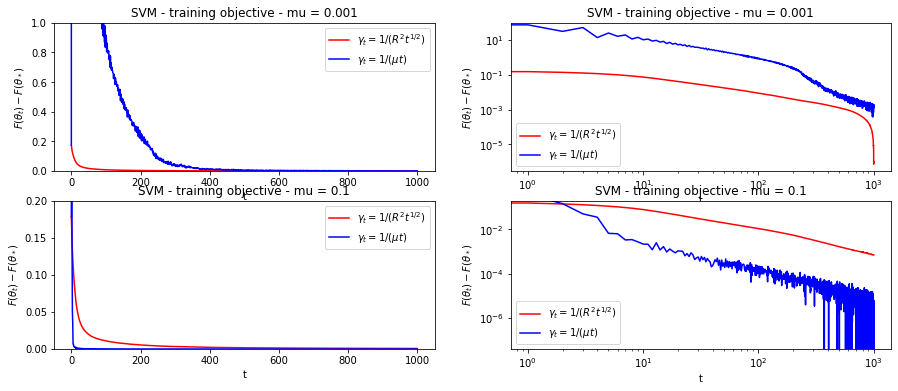

In [166]:
N = 1000 # number of data
T = 1000 # number of iterations
Mu = [0.001,0.1]
gamma_svm = 0.25

plt.figure(figsize=(15,6))
for idx,mu in enumerate(Mu):
    X,y = data_generation(N)
    theta_hat_svm = np.zeros(dim)
    lossR_list = [hinge_loss(y,np.matmul(X,theta_hat_svm))] # record for values of F
    for t in range(T):
        # print(t)
        theta_hat_svm -= gamma_svm*gradL(X,y,theta_hat_svm,mu)/math.sqrt(t+1)
        lossR_list.append(hinge_loss(y,np.matmul(X,theta_hat_svm)))

    theta_hat_svm = np.zeros(dim)
    lossmu_list = [hinge_loss(y,np.matmul(X,theta_hat_svm))] # record for values of F
    for t in range(T):
        # print(t)
        theta_hat_svm -= gradL(X,y,theta_hat_svm,mu)/((t+1)*mu)
        lossmu_list.append(hinge_loss(y,np.matmul(X,theta_hat_svm)))

    minimum = np.amin(np.array([lossR_list[-1],lossmu_list[-1]]))-1e-6
    lossR_list -= minimum
    lossmu_list -= minimum
    print(lossR_list)
    print(lossmu_list)
    plt.subplot(220+idx*2+1)
    plt.plot(np.arange(T+1),lossR_list,color='r',label=r'$\gamma_t=1/(R^2t^{1/2})$')
    plt.plot(np.arange(T+1),lossmu_list,color='b',label=r'$\gamma_t=1/(\mu t)$')
    ax = plt.gca()
    if mu == 0.001:
        ax.set_ylim([0,1])
    else:
        ax.set_ylim([0,0.2])
    plt.xlabel('t')
    plt.ylabel(r'$F(\theta_t)-F(\theta_*)$')
    plt.title('SVM - training objective - mu = {}'.format(mu))
    plt.legend()

    plt.subplot(220+idx*2+2)
    plt.plot(np.arange(T+1),lossR_list,color='r',label=r'$\gamma_t=1/(R^2t^{1/2})$')
    plt.plot(np.arange(T+1),lossmu_list,color='b',label=r'$\gamma_t=1/(\mu t)$')
    plt.xscale('log')
    plt.yscale('log')
    ax = plt.gca()
    if mu == 0.001:
        ax.set_ylim([0,100])
    else:
        ax.set_ylim([0,0.2])
    plt.xlabel('t')
    plt.ylabel(r'$F(\theta_t)-F(\theta_*)$')
    plt.title('SVM - training objective - mu = {}'.format(mu))
    plt.legend()

plt.show()

# Remarks

In [76]:
'''
Copy this line to the part "Convergence of gradient descent" for a better visualization (similar starting values of the function difference)

theta_hat = np.array([0.0, -1.0794462339303258e-301, -6.353885259100368e-177, -1.2015074548629884e-125, 3.6041395907472056e-98, 1.2857160797666673e-80, 5.461637836694726e-69, 4.8837859029348816e-59, -9.455695947346095e-52, 2.7493029182471684e-46, -7.536064298928719e-42, 2.878868369134232e-39, -7.076797870331846e-36, 4.947333045300085e-33, 9.70236009382702e-31, 5.970085258370336e-29, -2.8518504210749313e-28, -7.313100433685829e-26, -2.44155673605958e-24, -7.66037521794105e-23, 1.1682081218745845e-21, 1.5088848044142046e-21, 5.447436914375589e-20, 5.795070899999223e-19, -2.82423643665759e-18, -6.549790319781665e-18, 2.793345239045094e-17, 2.884584569129879e-16, -2.597189937445545e-16, -1.922906161545617e-15, 2.665786273813679e-15, 2.8628796808324003e-15, 3.631243755420153e-15, -1.515635259357535e-13, 4.282537465914373e-13, 4.137633716243716e-13, 6.48195322888667e-13, -1.2554117805259936e-12, 8.97372621930543e-12, 1.0504751194778709e-12, 1.5450767843631483e-11, -2.464541070444688e-11, -9.8895067364194e-12, 9.874910122881513e-12, -5.934863080652505e-11, -3.9446216983718656e-10, 2.1771732989970546e-10, -5.87830189224906e-11, -1.2459964401432163e-09, 1.1827613352617495e-09, -1.4583392211662254e-09, 2.3219055225384437e-10, 7.834231565931485e-09, 8.746304092931441e-09, 6.395899299491696e-09, 5.5289219442141654e-09, 7.2728322122425074e-09, -2.9422625302279097e-08, 6.190480494613514e-09, 9.51092483288274e-09, 3.063781815117831e-09, 5.6591613855169454e-08, -1.6545745531679462e-07, 1.5737641160329938e-07, 1.5995942142170623e-07, 6.666241071146485e-09, 7.428134088155263e-08, 1.2901254228799859e-07, -3.729111246239184e-07, -3.3812016572070913e-07, -1.025925093478584e-06, -6.43665838037484e-07, -7.945098708885314e-08, -4.943703808844982e-07, 5.966359553982692e-08, 2.009928816089437e-06, -2.7115735269028807e-06, 8.788803960687766e-07, -3.205273486774707e-07, -7.797253494488198e-08, 5.677770105885301e-06, -3.8811176524471225e-06, 1.2868156220089356e-06, 4.434854668858835e-06, -1.871971693482638e-05, -8.00088590221323e-07, 1.3696930858538121e-05, 1.639362359816928e-05, 4.920804968655854e-06, 5.969096782762021e-06, 4.60349069576564e-06, 2.706045256965573e-05, -3.904273784952814e-07, -1.3116064085349364e-05, -1.584193195847733e-05, 2.9737027947180533e-05, -4.49253628113278e-06, -1.5475384303639765e-06, 3.107111854127374e-05, 7.620784465282362e-05, 8.119514152318405e-05, -5.792179480634357e-05, 4.2644374234465743e-05, 8.78214587815625e-05, 0.00011258070316573172, -4.369772599493329e-05, -5.283597836772203e-05, 9.779606131754808e-05, 2.7335795361360467e-05, 0.0001386535968777752, -0.00017993774052124425, -0.0002627905147628602, 5.095957733857945e-05, -7.326121369459982e-05, -4.984093720674631e-05, -6.073113514180908e-05, -0.0002587892646399735, 1.1167126656306494e-06, -0.0003606292919428314, -0.00011887161950751948, 0.00019262327168647513, -0.00014492962267464575, 0.00040346892102133383, 8.171889055478121e-05, -0.0005241511157198289, -0.0005272213499202008, -0.00013398414506442423, 0.00026988664999437885, 0.00011092458953544375, -0.0002026515107336576, 0.00045974901679432967, 0.0003873800748664916, 0.0011394010958948588, -0.0004670595461048091, -0.0008691781405895043, 0.00022834413496117993, 0.0008057921572998049, 6.309577722313448e-05, 0.00015867314510098596, 0.001178357424104647, -0.0013331244223961569, -0.0012747205149915542, 0.0013414966684139537, -0.0009200594245484114, 0.00016627289101660018, 0.0012508999949160397, 0.0012001831256328404, 0.0010756846644393425, -0.0015741806741884795, 0.00016341312118038954, 0.0003559940520343249, -0.0007912058537032337, -0.00038341855434399454, -0.0003268947529357326, 0.0014460956863442378, 0.0012529557686553395, -0.0011250328604951209, -0.002123843149997817, 0.0024390363651047697, -8.122987266939428e-05, -0.00021458728006460434, 0.0012756868628550067, 0.002187803425336262, -0.001567870941122165, 0.0013724391841838793, -0.001398823540885329, 0.00026670572374128376, 0.0006384017873405226, 0.0008035696641842301, 7.416333692949471e-05, -0.0014461147468415737, 0.003535913852466069, -0.0006906551918498978, 0.002594008202123468, 0.0013176160412362405, -0.0006346999968250325, 0.0033336681333836693, -0.0031352231242118807, 0.003808089303580879, -0.002155677366671176, -0.004102841267933723, 0.009573176226281654, 0.00011018494391327513, 0.005012057070134998, 0.0030353636512190463, 0.00934316331139236, 0.001089545393401557, 0.002847044549570066, 0.0015246663004112012, 0.0017932458767282995, -0.002813743399826561, -8.939326344238343e-05, 0.014586002636376568, -0.004233129291483848, -0.0004968428752977222, 0.0025697606274182115, -0.0019018014622049241, -0.0017753995062922327, 0.006979185253662901, 0.006712878417116018, -0.0020912986334646055, -0.0038276701185939784, 0.0020047361563093518, 0.0029279775344971557, -0.0043385358790854955, 0.0049705419746220204, 0.00525884761408041, 0.0016837947634282965, 2.4581461415703735e-05, 0.022153393164724946, -0.012563329220632498, -0.004847882895394028, -0.01317829870550956, -0.010567154456846866, -0.006897235467439563, 0.000855839127309651, 0.0033393435703048683, -0.004329057992522218, 0.00023489313928701128, 0.018729802630282046, 0.006326643176125342, -0.012497720006987432, -0.006124912602892358, -0.005984071192484717, 0.0008233390460273751, 0.007955694688259655, 0.008159103674302517, -0.006669613634012601, -0.00695169029027324, 0.005086479101355169, 0.0021941581796185686, -0.0017594195230782501, -0.011270093079601617, -0.011898603947284512, 0.008865037832149657, 0.00033876611841446964, -0.01066241195677314, -0.021323630216756942, -0.015237898495979186, 0.02244721375610695, -0.006123482918496872, 0.012302550131529094, 0.02551284381133204, -0.00018869136282536914, -0.02175253570443684, -0.009873210350327455, -0.026936272129809296, 0.0027862585358080635, -0.00216734908689577, -0.004202106148741199, 0.019585054902613898, 0.01403756005112969, 0.012023781685871213, 0.008726030565595826, 0.0018705413059650947, 0.0018254148895454152, 0.011740078792214287, -0.019585388470024397, -0.06093181861811124, 0.04535108679968812, -0.013299978878954186, -0.0018280320983992695, 0.02203214591350018, -0.0032324433985685894, -0.02090706466602861, 0.016779439870350833, 0.002919978330020401, -0.00536290072715173, -0.01080917991842647, -0.02176332881890065, -0.020953675618191416, 0.024474738337792606, 0.03355999214774759, -0.006955673581965548, -0.008764130525737282, 0.03296237618888582, 0.018794608557335734, -0.027889813379301354, 0.0010423081119587945, -0.0007920170513957828, -0.007335753367296446, -0.006994625627305464, 0.059741558412014825, -0.036960415350067735, -0.002265082839997773, -0.0031534404196247507, 0.0037435069056166365, -0.004309310533530569, 0.04247814906547112, -0.010637485675134558, -0.04613917087248833, -0.0009947437087954843, -0.04364592229877767, 0.0049858808702995215, 0.06953239292292468, -0.012259108029731007, -0.024836346781263254, 0.02471578494059468, -0.04711700771311335, -0.006060773444158005, 0.010995847380339348, 0.022963701274122634, -0.0094619936433138, 0.07139814384611189, 0.016866809304721054, 0.07080082278774268, -0.02711034368485564, 0.06664130391990443, 0.07088914883432688, 0.031116598633543952, 0.03588775778835529, 0.010396790108128152, 0.030775005316761556, -0.0019295918848663705, 0.0587856865127176, 0.06529053389096798, -0.034613893511337146, -0.03427779408596308, -0.02843381762932974, 0.014303912268388081, -0.0031212996614472313, 0.0912665612077495, -0.007709731154529795, -0.04577546301612622, 0.09822230460141282, -0.061549734445915584, -0.05178267237363057, 0.01880544747244367, -0.08606498576125148, -0.018418722413100212, -0.1393231206964706, 0.12097309637594907, 0.009310921016410406, 0.004149825815124427, -0.019636701009539126, 0.03680996521296711, 0.036539570665984455, -0.04519594126869151, 0.003380908628354304, -0.06624636595269046, 0.005429699504478404, 0.027092672450391115, 0.087129469671578, 0.06309922591035746, 0.030763501136723787, 0.08900109637280716, 0.05592647036866851, 0.050419639237135605, -0.020793601377240886, -0.04417681807469116, -0.005630099820316443, 0.0245543823386266, 0.048246148392368904, -0.05263772025950217, -0.020806030470886434, 0.06667018715805961, -0.021561100473029317, 0.08841119099180463, 0.020012991844338714, -0.08556163172433094, 0.10189634963063902, -0.01654622297367763, 0.10078781510662961, -0.14926378823320247, 0.08800301404691675, -0.04739120556115211, 0.1563315547823828, 0.035340219240920095, -0.028803378405266703, -0.032046449063607624, 0.0018366737971319842, 0.05020236922222773, -0.05423278104647077, 0.12690080618522925, -0.06277048709528774, 0.003189048826887461, -0.05137316312610111, -0.01392615006801223, -0.0370396330359114, -0.03175238274910884, 0.06511610487059977, -0.11839163280075433, 0.11818484166401104, -0.043475520187283616, -0.13875804403249922, 0.12284161519822893, 0.06976085954917399, 0.028101241898861595, -0.018515906255406434, -0.03409849436009607, 0.18282726296521812, 0.0332471691226002, 0.2919197558694687, -0.04642249022592993, 0.0026379843022376584, -0.07003724883914784, -0.0035861569159449385, 0.0028883162024145536, -0.045589252395264485, -0.0284267177990285, -0.16644601383335647, -0.02816939790530861, 0.06493142881066614, -0.04448284047548692, -0.1818237777996857, -0.06933768011471543, 0.03731013000129974, -0.09103168134533576, -0.11748214552007845, 0.015622395397391561, 0.020986194363062406, -0.06545195923535574, 0.09295678334209491, 0.04596990249114921, -0.03688341609879884, 0.04536082323008424, -0.029550509965562383, 0.16358771362895866, -0.053537946160551575, -0.17037486318337405, -0.03249496313251019, -0.0006102319873432171, 0.02459780474610441, -0.11387409224100477, 0.030533211905059112, -0.16375477374249586, -0.12863345868884862, -0.007303735823813955, -0.044437651503642234, 0.17325270000766532, 0.036434547738360544, -0.010676308622248703, -0.041566039766384275, 0.02317981000886709, 0.08347588118142894, -0.12384032704414438, 0.06879485951762761, 0.15481610809808188, -0.027743603394058645, -0.13136132895826783, -0.07311027282281206, 0.0759231830094355, -0.07231262026856648, 0.13356153534225543, 0.05041288545461175, -0.21348031204828993, 0.15331664818748336, -0.10460023746737816, 0.05480379148418446, -0.12792176332773986, -0.13709702887317538, 0.27672399766720357, -0.09900988285643332, -0.027553933544566124, -0.0185992385889183, -0.02773314794609319, 0.03336293382711908, 0.0443622288906937, 0.16317234581285503, -0.09911742655864131, -0.0417410746605245, -0.03454215989440523, -0.006822411407123486, 0.044072467752561385, -0.10366928710520995, -0.08098004812167803, 0.12364975192660979, -0.057576736795741594, -0.019812314502816137, -0.1279422813323616, -0.16816694131046, 0.22140722305889657, -0.03833754071661721, -0.09326249652096855, 0.044143485155027626, -0.018340971587416693, -0.06737539106263377, -0.1251299090183937, -0.07337695008726608, -0.3026509469040216, 0.011558530623689093, 0.20558119161005697, -0.2323072946846989, -0.029956273446806913, -0.019214873936585667, -0.06637751765414206, 0.01025462583249275, 0.1042987709807737, 0.027112886241595725, -0.05897628939098661, 0.0352028502959388, -0.01951007989012158, 0.019606459527421804, 0.09429042778787944, -0.14478327806260222, -0.15682878447452814, -0.0683741589765238, -0.09434238969513052, 0.07440250291588113, 0.2077838615044854, 0.11102231357888895, 0.0839223620028127, -0.07836737877844283, 0.003927347553153726, 0.06957937583982488, -0.1473075909017279, -0.00018704604992413794, -0.012240134279406645, -0.027783676126349344, 0.0596858326105617, -0.13598130576688855, -0.23647916991319146, -0.12107414170861039, -0.15155233325288145, -0.014093724560272877, -0.16868981356702614, 0.2562451959599759, 0.034099348811327077, 0.16512367265240327, -0.18974232519853698, -0.24815730798880653, 0.026437023294273013, 0.07519754596880109, -0.020894184991478756, -0.0636811714272118, 0.10659983247680765, 0.06585522971588696, -0.10408550113122447, -0.10195606348742674, -0.2232846631660678, -0.18849948850908402, 0.1523083105257919, 0.111891350841993, 0.046549635626913034, -0.5156492073013047, 0.11230483517133219, -0.1520177219163037, 0.150271407282105, 0.26815834617034884, 0.07110908503367294, -0.03990012079099406, 0.055516910222035816, -0.09620166442176442, -0.21631478149385652, 0.07315721370456667, 0.07858136705409277, -0.047861382796244134, -0.04281546637554089, 0.32680646272478975, 0.32053865573844315, 0.10349901192584872, -0.20137519053217068, 0.15320181435076746, -0.009380718528187379, -0.19799683095392775, -0.17828438302382793, 0.14027714743398098, 0.021744111930535916, 0.2396102193656729, 0.17412544956079684, -0.065997602393742, 0.0010431591500074712, 0.15418707059826475, -0.1227630297930293, 0.12013950165726543, -0.021116945601937782, -0.378929220388082, -0.411369481571417, -0.24173917094365455, -0.13865100459969898, -0.01328560775845634, -0.08404165257804788, 0.010297618834034399, 0.27155399148839415, 0.03294190436343143, -0.19980941447804565, -0.28632669201250577, -0.28252279190055707, -0.3780051727819832, 0.18165227915723847, 0.017614208649576368, -0.10450644513725159, -0.029406180736704528, 0.3297369409624795, -0.14002267731317872, 0.048955496347995724, 0.04452542308341738, 0.10682917461082961, -0.04765050742665135, -0.30954136627839585, -0.20188941956619644, 0.017354056201736856, -0.23869666581931717, 0.050459606177684566, 0.12093456490893699, 0.11881806090989039, 0.23402380756835725, -0.0952098781440735, 0.1310128246142928, 0.13319918498890546, 0.45347559066785237, 0.043382800916624366, -0.31567447117959524, -0.09553695288952685, 0.13034628277894422, 0.04846564897045821, 0.3778869206641886, 0.07007801504141303, 0.09170166956351063, 0.1772645458353921, 0.10942914515704412, -0.02339409373468785, -0.4198806600468957, 0.0840228841616825, 0.07987059965431546, -0.009193019509882201, -0.42046855001163047, -0.28202250062036854, 0.02373513977448781, 0.11680191452662247, -0.10404487282294128, 0.4001604761398431, -0.22146942594286445, -0.2909384963927384, 0.16169729002664973, -0.03950385292808559, -0.2240862401770147, 0.1032725107377252, -0.020811500015028482, -0.007791383195048664, -0.4692610066186083, -0.2848824381305805, 0.13676926644176987, -0.07345220569576576, -0.14633214050573062, 0.1565081000829358, 0.03379290688083075, -0.1945291465432179, 0.25049446153249055, -0.2689214129662478, 0.04298206342613717, 0.2547762204863363, -0.20464505126067817, -0.0581063407782884, 0.15783667207097832, 0.07775270610613921, -0.16187132341753263, -0.06571239533868757, -0.24948991196094544, 0.2613710077135544, -0.07685872882803785, 0.07679584427736684, 0.31131852209618777, -0.059082882899550083, 0.031135853318627008, 0.10153365857716071, -0.029504056615549543, -0.24190330177730832, 0.18381761441789757, 0.43168741779623854, 0.17303786614202027, 0.13638808235166763, 0.10278750127429326, 0.4559737647529328, 0.30004822882624393, -0.12045115338615853, 0.018206451396226852, -0.18561807577790737, 0.10899936474734773, -0.26208080378526427, -0.07734794474603358, -0.5248240304255224, 0.11574623429735757, -0.17172753768551008, 0.04549815678400069, 0.14711148303447533, -0.13438949023479196, -0.5147095449850698, 0.057884691545054476, 0.18234214264999843, -0.36671772049114537, 0.4497497662717365, 0.5737164798703429, 0.5124434054080617, 0.054952705259380334, 0.33842608305642485, 0.06246466106194543, -0.14768890420826125, -0.3833796890831973, 0.3779148124501744, 0.26542725493259467, 0.018429890496738283, 0.19692756147436252, -0.1039746251417911, 0.05135655965393745, -0.13474867459904097, -0.37878902004729104, 0.20588596342870316, 0.2080152012163413, 0.10157887886040537, -0.2612722245204978, -0.35702298387233417, -0.003978511723709903, -0.2912918529210612, -0.09774070574437173, -0.16864481724664554, -0.13386850502805422, 0.024869444250139688, -0.03617325995634732, 0.0885979351048993, 0.38366210965488123, 0.05811485565424548, -0.29213106787492416, 0.28364397078463716, -0.08246952492516472, -0.31677544182095824, -0.20075975550955805, -0.2354478245400701, 0.4514459186046288, 0.04031950532097648, 0.24317102465230828, -0.12961558932834116, -0.13295588944033057, 0.2019141877932712, -0.2574731821799705, 0.33968224931827373, -0.06590599283781684, 0.1601423480838316, 0.05157730117059137, -0.10860045688731804, 0.11877265847772427, -0.016891847781826636, 0.17726039237396546, 0.04352338393187215, 0.2652746656077678, 0.27791614455741404, -0.044307452848454554, 0.008417084165022324, 0.20411375317264605, -0.31644099550185867, 0.08871428040575595, 0.016536233629814726, 0.06926266532166336, -0.20518809942195843, -0.2323597124724856, -0.05639397049465682, -0.23289548640075608, 0.24364944373078154, 0.029771683923638555, 0.08346627259920505, -0.4427080385453247, 0.1029823018937454, -0.3711760438362234, -0.3804720120851252, 0.20741256987483142, 0.10468282036779337, 0.02116287809110885, 0.26480273662850257, 0.061965725508565155, -0.1902334561318315, -0.06651367942280827, 0.20830033985949117, -0.4951662937583973, 0.27929065475712006, 0.022839375649953128, 0.20351222509913836, -0.41235391960336887, 0.19589675550972882, 0.20157671231333255, 0.5227537587998639, 0.012272686822622926, 0.18607791150895883, -0.22617069317999175, 0.3136708562276261, -0.20699983076513775, -0.04993517377178094, -0.18780830464004528, -0.17827780468370683, -0.7418724616241564, 0.013743364049437509, 0.05430024228583999, 0.03314660705566182, -0.1449936410735325, 0.539651923306456, 0.1379501684837948, -0.13412826024505015, 0.14306141749993231, 0.1449911210185421, 0.0314475076265059, -0.6745371086210107, -0.24246812975899124, -0.45003062061708227, 0.3230848727955042, -0.06702307036313052, -0.12658088146794017, -0.13198896991867795, -0.25542226592151884, 0.10757144404215864, 0.08946326869875995, -0.07011573035539026, -0.1295617414868839, -0.07403427143503807, 0.1471082934648712, 0.05416139280619612, -0.11796649459556385, -0.28726383088946095, -0.16237549690766762, -0.6154235517508682, -0.5501145995098753, 0.04901056552414475, 0.18292000558124225, 0.32810331581980645, 0.5743770418831321, 0.0930177563023135, -0.059592682663458886, 0.126537542455093, -0.32250977018598914, -0.15668189393925208, -0.1158562810853274, -0.005093559861404935, 0.7076451601808595, 0.2955803393618017, -0.09650091897362327, 0.003330083023304218, -0.5960155713747244, 0.1334468470225029, -0.009175388057504704, -0.4664985024386744, 0.19886678132068955, 0.09050871456058028, -0.3156564794112489, -0.2872130808053255, 0.3939486808293145, -0.2671923883749892, -0.9032438758434168, 0.11562236271374923, 0.19972814507293077, -0.1161790796712086, -0.42589728427818946, 0.48575894787690493, 0.38156155741655345, 0.1635752038308257, 0.23000761326298513, 0.06457888342678714, 0.468857645689502, -0.334911767951928, -0.21811773790882497, 0.1996155852963461, 0.49493831582593106, 0.12288175799475086, -0.6106379615344832, 0.1378501274478301, -0.09416125989322327, -0.3669820295526448, -0.0010949279112756752, -0.13261369222612832, 0.7427108293794693, -0.04610982185583561, 0.24777347459220794, 0.019579457559248396, 0.30580213951919233, -0.3764772646770557, -0.04723294822931998, 0.29053611944365115, 0.056263320290350645, 0.46855691093569685, -0.2659616443530233, 0.007506823087540123, -0.09792136189798022, -0.7693505903275413, -0.2321046460343433, -0.11905412536848332, 0.0598927132375023, 0.312760790017139, -0.13513014142034704, -0.3037790353824255, 0.08097215274910977, -0.735657703705572, -0.4424859223900894, -0.33837947028377924, -0.016780313011618083, 0.2807389760988922, -0.6378644938578271, 0.02197817733266201, -0.03942713323833757, 0.0808284117935779, -0.12803282171194924, 0.2419989164127206, 0.20945587554085396, 0.010310644881895337, 0.23840184635219525, -0.28648568165894306, -0.034227926519522126, -0.2658984655847474, -0.3053572925760369, -0.1651649424871509, 0.19699535142249783, 0.07529879413639669, 0.004354775391318057, -0.3622760491874528, -0.23264882042742016, 0.27021879466052995, -0.05213444575711831, 0.19528772055134808, -0.027651019041268484, -0.2488359625004675, -0.19854238632472349, 0.04293421791948664, 0.24722800897185093, 0.26980837077925857, 0.12091657015378558, 0.32871715839183663, 0.15249466889122593, 0.2394147442384035, -0.1655219310327467, -0.14732654745644055, -0.12475513229770084, 0.20203313659163913, -0.5794411131635896, 0.04143104872343437, 0.10177576031794033, 0.16153046323452863, 0.415700844988892, 0.2790865923912974, -0.07577388912453022, -0.37446661342586907, -0.03131620915887383, -0.6563562155948356, -0.4577416618281216, 0.20414622035255323, -0.26826730269575105, -0.5188862168383728, -0.029691437601960597, 0.24256918730754395, 0.058467389752878955, 0.2740473142884788, 0.23717729368850818, 0.031831846225740326, -0.14825111466229587, -0.37204541411216757, -0.10412525882784676, 0.3090468280937759, -0.27372872639586016, -0.14549391012457913, -0.4416926687541573, -0.6084693198306932, 0.29613481517049106, 0.08525929700752385, 0.07821266395802821, -0.1644670550408493, 0.08461141844917046, -0.22912043667901144, -0.39876278793491565, 0.10029919193412593, -0.3561568188255241, 0.32751889248599114, 0.5535586194702521, 0.5401879001871303, -0.8940301901276922, 0.432206193504256, 0.20760842730116372, 0.09727023971266395, 0.3024042837210078, 0.4862230510638536, 0.5170265095069115, -0.17207749153573665, -0.16838817835738187, 0.07549656609509944, -0.4650479392997188, -0.03989308024367947, 0.07048058047741308, 0.04542083483016123, -0.07611804733826974, 0.18291144722691055, 0.005840038486891465, -0.2261936604547022, -0.34384353862555317, 0.23674565958583468, -0.3546928680990817, 0.2227551944498121, -0.25834714265821596, -0.024004153307664193, -0.26345300769527136, -0.6116006486739832, 0.25603219343897143, -0.39370477786079217, 0.0653215932149901, -0.3383880916131284, -0.6192691447594875, 0.3373089766086828, 0.32641269910894144, 0.1522876234537035, 0.8058353254795724, 0.32672249757683236, -0.3336157268430253, -0.16966066128411833, -0.5197683004944532, 0.1739253127826057, 0.0055496512408208425, -0.16123603830843694])
'''

'\nCopy this line to the part "Convergence of gradient descent" for a better visualization (similar starting values of the function difference)\n\ntheta_hat = np.array([0.0, -1.0794462339303258e-301, -6.353885259100368e-177, -1.2015074548629884e-125, 3.6041395907472056e-98, 1.2857160797666673e-80, 5.461637836694726e-69, 4.8837859029348816e-59, -9.455695947346095e-52, 2.7493029182471684e-46, -7.536064298928719e-42, 2.878868369134232e-39, -7.076797870331846e-36, 4.947333045300085e-33, 9.70236009382702e-31, 5.970085258370336e-29, -2.8518504210749313e-28, -7.313100433685829e-26, -2.44155673605958e-24, -7.66037521794105e-23, 1.1682081218745845e-21, 1.5088848044142046e-21, 5.447436914375589e-20, 5.795070899999223e-19, -2.82423643665759e-18, -6.549790319781665e-18, 2.793345239045094e-17, 2.884584569129879e-16, -2.597189937445545e-16, -1.922906161545617e-15, 2.665786273813679e-15, 2.8628796808324003e-15, 3.631243755420153e-15, -1.515635259357535e-13, 4.282537465914373e-13, 4.137633716243716e-1